In [1]:
# pip install -U finance-datareader

Requirement already up-to-date: finance-datareader in c:\programdata\anaconda3\envs\collect\lib\site-packages (0.9.6)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import FinanceDataReader as fdr

In [2]:
df_krx = fdr.StockListing('KRX')
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,반채운 윤규선 이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [6]:
len(df_krx)

2562

In [7]:
#삼성전자 2019년
price = fdr.DataReader('005930', '2019-01-01' , '2019-12-31')
price.head(10)

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292
2019-01-03,38300,38550,37450,37600,12471493,-0.029677
2019-01-04,37450,37600,36850,37450,14108958,-0.003989
2019-01-07,38000,38900,37800,38750,12748997,0.034713
2019-01-08,38000,39200,37950,38100,12756554,-0.016774
2019-01-09,38650,39600,38300,39600,17452708,0.039370
2019-01-10,40000,40150,39600,39800,14731699,0.005051
2019-01-11,40350,40550,39950,40500,11661063,0.017588
2019-01-14,40450,40700,39850,40050,11984996,-0.011111


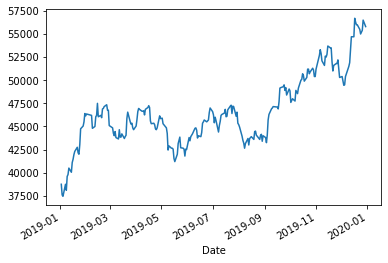

In [8]:
price['Close'].plot()

#### OBV 지표 그리기

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [10]:
open = price.Open
high = price.High
low = price.Low
close = price.Close
volume = price.Volume

- 당일 종가 > 전일종가 : 𝑂𝐵𝑉=𝑂𝐵𝑉−1 + 당일 거래량
- 당일 종가 < 전일종가 : 𝑂𝐵𝑉=𝑂𝐵𝑉−1 − 당일 거래량
- 당일 종가 = 전일종가 : 𝑂𝐵𝑉=𝑂𝐵𝑉−1

In [11]:
def OBV(close, volume):
    obv = pd.Series(index=close.index)
    obv.iloc[0] = volume.iloc[0]
    
    #OBV산출공식
    for i in range(1, len(close)) :
        if close.iloc[i] > close.iloc[i-1]:
            obv.iloc[i] = obv.iloc[i-1] + volume[i]
            
        elif close.iloc[i] < close.iloc[i-1] :
            obv.iloc[i] = obv.iloc[i-1] - volume[i]
            
        else:
            obv.iloc[i] = obv.iloc[i-1]
    
    return obv

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


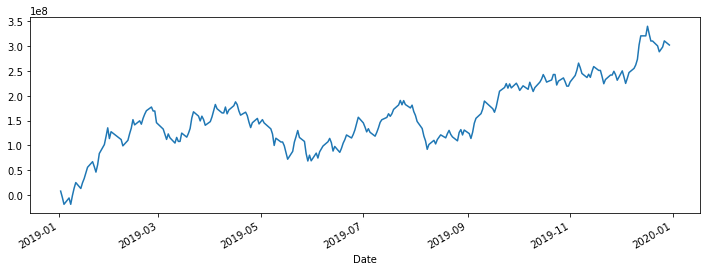

In [12]:
# obv
obv = OBV(close, volume)
obv.plot(figsize=(12,4))

In [13]:
price['OBV'] = obv

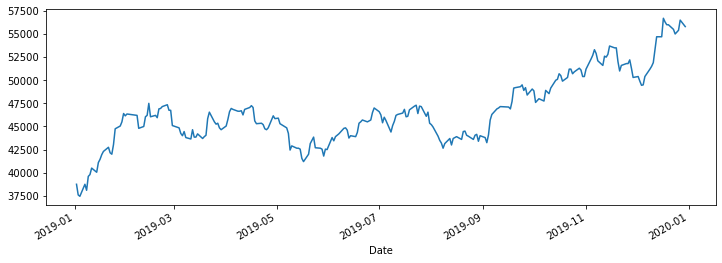

In [14]:
# 주가 그래프
price['Close'].plot(figsize=(12,4))

주가 그래프와 OBV 그래프의 동향이 비슷함

In [15]:
price_HL = price[['High', 'Low']]
price_HL.head()

,High,Low
Date,,
2019-01-02,39400,38550
2019-01-03,38550,37450
2019-01-04,37600,36850
2019-01-07,38900,37800
2019-01-08,39200,37950


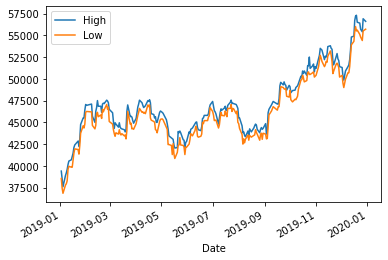

In [16]:
price_HL.plot()

In [17]:
price.head()

,Open,High,Low,Close,Volume,Change,OBV
Date,,,,,,,
2019-01-02,39400,39400,38550,38750,7847664,0.001292,7847664.0
2019-01-03,38300,38550,37450,37600,12471493,-0.029677,-4623829.0
2019-01-04,37450,37600,36850,37450,14108958,-0.003989,-18732787.0
2019-01-07,38000,38900,37800,38750,12748997,0.034713,-5983790.0
2019-01-08,38000,39200,37950,38100,12756554,-0.016774,-18740344.0


In [18]:
# price.to_csv("samsung2019.csv")

In [19]:
roll_mean5 = pd.Series.rolling(price['OBV'], window=5, center = False).mean()
roll_mean10 = pd.Series.rolling(price['OBV'], window=10, center = False).mean()
roll_mean20 = pd.Series.rolling(price['OBV'], window=20, center = False).mean()

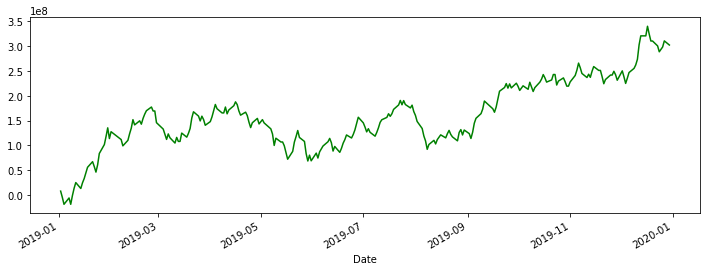

In [20]:
price['OBV'].plot(color='green', figsize=(12,4))

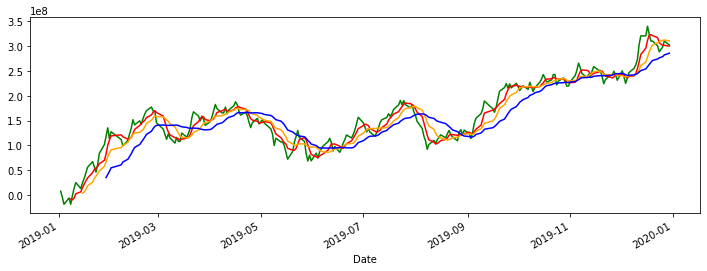

In [21]:
# obv이동평균 시각화 
price['OBV'].plot(color='green', figsize=(12,4))
roll_mean5.plot(color='red', label='5 day rolling mean')
roll_mean10.plot(color='orange', label='10 day rolling mean')
roll_mean20.plot(color='blue', label='30 day rolling mean')

단기 이평선과 장기 이평선의 추이가 역전되지 않는 모습이 지속됨

### 재무재표 가져오기

- 재무제표 URL
https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=종목코드&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701

- 재무비율 URL
https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=종목코드&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701



In [3]:
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime 
import time 
import urllib.request
from selenium.webdriver import Chrome
import json
import re     
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import datetime as dt

In [4]:
chrome_driver = './chromedriver.exe'
driver = webdriver.Chrome(chrome_driver)
driver.implicitly_wait(10)

In [5]:
def get_html(ticker, gb):
    #gb: 0 : 재무제표, 1 : 재무비율, 2: 투자지표, 3:컨센서스 
    url=[]

    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Finance.asp?pGB=1&gicode=A" + ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=103&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_FinanceRatio.asp?pGB=1&gicode=A" + ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=104&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Invest.asp?pGB=1&gicode=A"+ ticker + "&cID=&MenuYn=Y&ReportGB=&NewMenuID=105&stkGb=701")
    url.append("https://comp.fnguide.com/SVO2/ASP/SVD_Consensus.asp?pGB=1&gicode=A" + ticker +"&cID=&MenuYn=Y&ReportGB=&NewMenuID=108&stkGb=701")

    if gb>3 :
        return None

    url = url[gb]
    try:

        response = requests.get(url,headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text)

    except AttributeError as e :
        return None

    
    return soup

In [6]:
text = get_html('005930',1)
text

C:\ProgramData\Anaconda3\envs\collect\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file C:\ProgramData\Anaconda3\envs\collect\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


<!DOCTYPE html>
<html lang="ko">
<head>
<link href="../css/compeach.css?ver3" rel="stylesheet"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<!-- <meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"> -->
<script src="../js/lib/jquery-1.11.1.min.js" type="text/javascript"></script>
<script src="../js/comp_load.js?ver=1.1" type="text/javascript"></script>
<script src="../js/lib/jquery.autocomplete.js" type="text/javascript"></script>
<link href="../css/jquery.autocomplete.css" rel="stylesheet" type="text/css"/>
<link href="/SVO2/img/CompanyGuide.ico" rel="SHORTCUT ICON"/>
<script src="../js/autocomplete.js" type="text/javascript"></script>
<meta content="" name="author"/>
<meta content="" name="description"/>
<title>삼성전자(A005930) | 재무비율 | 기업정보 | Company Guide</title>
<script>
        $(function(){
            if ($('#stkGb').val() !='751' && $('#gv_s

In [7]:
def fin_data(ticker,gb,item,n,freq="a") :
# n: 최근 몇 개의 데이터를 가져 올것인지
#  freq: Y : 연간재무, Q : 분기재무 
    soup = get_html(ticker,gb)
    return soup
#     d = soup.find_all(text=item)


#     if(len(soup)==0) :
#         return None
    
#     #재무제표면 최근 3년을 가져오고 재무비율이면 최근 4년치를 가져온다.
#     nlimit =3 if gb==0 else 4

#     if n > nlimit :
#         return None
#     if freq == 'a':
#         #연간 데이터
#         d_ = d[0].find_all_next(class_="r",limit=nlimit)
#         # 분기 데이터
#     elif freq =='q':
#         d_ = d[1].find_all_next(class_="r",limit=nlimit)
#     else:
#         d_ = None

#     try :
#         data = d_[(nlimit-n):nlimit]
#         v = [v.text for v in data]

#     except AttributeError as e:
#         return None

#     return(v)


In [8]:
#최근 3년치의 매출액증가율 (마지막은2020년이므로 빼야함)
soup = fin_data("005930",1,"매출액증가율",4,"a")

In [9]:
soup

<!DOCTYPE html>
<html lang="ko">
<head>
<link href="../css/compeach.css?ver3" rel="stylesheet"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta charset="utf-8"/>
<meta content="width=device-width" name="viewport"/>
<!-- <meta content="width=device-width,initial-scale=1.0,minimum-scale=1.0,maximum-scale=1.0" name="viewport"> -->
<script src="../js/lib/jquery-1.11.1.min.js" type="text/javascript"></script>
<script src="../js/comp_load.js?ver=1.1" type="text/javascript"></script>
<script src="../js/lib/jquery.autocomplete.js" type="text/javascript"></script>
<link href="../css/jquery.autocomplete.css" rel="stylesheet" type="text/css"/>
<link href="/SVO2/img/CompanyGuide.ico" rel="SHORTCUT ICON"/>
<script src="../js/autocomplete.js" type="text/javascript"></script>
<meta content="" name="author"/>
<meta content="" name="description"/>
<title>삼성전자(A005930) | 재무비율 | 기업정보 | Company Guide</title>
<script>
        $(function(){
            if ($('#stkGb').val() !='751' && $('#gv_s

In [11]:
def replace_words(string):
    new_string = string.replace("\xa0","").replace("\n","").replace("펼치기","")
    return new_string

In [12]:
item_list = []
for item in soup.select("th.l.clf"):
    temp_item_list = []
    for el in item.parent.children:
        try:
            temp_item_list.append(replace_words(el.text))
        except:
            continue
    item_list.append(temp_item_list)
item_list

[['유동비율(유동자산 / 유동부채) * 100유동비율계산에 참여한 계정 ',
  '258.5',
  '218.8',
  '252.9',
  '284.4',
  '288.3'],
 ['당좌비율(당좌자산 / 유동부채) * 100당좌비율계산에 참여한 계정 ',
  '225.0',
  '181.6',
  '210.9',
  '242.4',
  '244.4'],
 ['부채비율(총부채 / 총자본) * 100부채비율계산에 참여한 계정 ',
  '35.9',
  '40.7',
  '37.0',
  '34.1',
  '34.2'],
 ['유보율(유보액 / 자본금) * 100유보율계산에 참여한 계정 ',
  '21,757.6',
  '23,681.4',
  '26,648.2',
  '28,302.4',
  '28,699.8'],
 ['순차입금비율(순차입부채 / 총자본) * 100순차입금비율계산에 참여한 계정 ',
  'N/A',
  'N/A',
  'N/A',
  'N/A',
  'N/A'],
 ['이자보상배율(배)영업이익 / 이자비용(비영업)이자보상배율계산에 참여한 계정 ',
  '49.7',
  '81.9',
  '87.3',
  '40.5',
  '46.0'],
 ['자기자본비율(총자본 / 총자산) * 100자기자본비율계산에 참여한 계정 ',
  '73.6',
  '71.1',
  '73.0',
  '74.6',
  '74.5'],
 ['매출액증가율((매출액 / 매출액(-1Y)) - 1) * 100매출액증가율계산에 참여한 계정 ',
  '0.6',
  '18.7',
  '1.8',
  '-5.5',
  '5.6'],
 ['판매비와관리비증가율((판매비와관리비 / 판매비와관리비(-1Y)) - 1) * 100판매비와관리비증가율계산에 참여한 계정 ',
  '3.1',
  '8.2',
  '-7.3',
  '5.5',
  '5.0'],
 ['영업이익증가율((영업이익 / 영업이익(-1Y)) - 1) * 100영업이익증가율계산에 참여한 계정 ',
  '10.7',
  '83.5',


In [13]:
import fileIO as IO
for item in item_list:
    item[0] = item[0].split("(")[0]
#    list(map(lambda i:i[0].split("(")[0], item_list))
item_list

[['유동비율', '258.5', '218.8', '252.9', '284.4', '288.3'],
 ['당좌비율', '225.0', '181.6', '210.9', '242.4', '244.4'],
 ['부채비율', '35.9', '40.7', '37.0', '34.1', '34.2'],
 ['유보율', '21,757.6', '23,681.4', '26,648.2', '28,302.4', '28,699.8'],
 ['순차입금비율', 'N/A', 'N/A', 'N/A', 'N/A', 'N/A'],
 ['이자보상배율', '49.7', '81.9', '87.3', '40.5', '46.0'],
 ['자기자본비율', '73.6', '71.1', '73.0', '74.6', '74.5'],
 ['매출액증가율', '0.6', '18.7', '1.8', '-5.5', '5.6'],
 ['판매비와관리비증가율', '3.1', '8.2', '-7.3', '5.5', '5.0'],
 ['영업이익증가율', '10.7', '83.5', '9.8', '-52.8', '3.4'],
 ['EBITDA증가율', '5.5', '51.7', '12.7', '-32.8', '3.9'],
 ['EPS증가율', '24.5', '98.2', '11.1', '-47.5', '-4.3'],
 ['매출총이익율', '40.4', '46.0', '45.7', '36.1', '37.1'],
 ['세전계속사업이익률', '15.2', '23.5', '25.1', '13.2', '12.2'],
 ['영업이익률', '14.5', '22.4', '24.2', '12.1', '11.7'],
 ['EBITDA마진율', '24.8', '31.6', '35.0', '24.9', '25.0'],
 ['ROA', '9.0', '15.0', '13.8', '6.3', '5.5'],
 ['ROE', '12.5', '21.0', '19.6', '8.7', '7.6'],
 ['ROIC', '20.3', '33.2', '30.4', '1

In [17]:
IO.list_to_csv("재무제표.csv", item_list)

{}